# QuantaMental Mean Reversion Logistic Regression Large Cap Stock Screener

In [233]:
import pandas as pd
import pandas_datareader as dr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from yahoo_fin import stock_info as si
import yfinance as yf
import seaborn as sns
import math
import morningstar_stmt as ms
import datetime

# Main

In [5]:
Tickers = si.tickers_dow() + si.tickers_sp500()

def QuantaMental(MAINTEST):
    
    df_test = dr.data.get_data_yahoo(MAINTEST, start = datetime.datetime.now() - datetime.timedelta(days=5*365), end = datetime.datetime.now())    df = df.transpose()
    df = df.loc['Adj Close']
    df = pd.DataFrame(df)

    df.reset_index(level=0, inplace=True)
    df['Date'] = df['Date'].astype('datetime64')
    df.rename(columns = {'Date': 'date', 'Adj Close': 'adj_close'}, inplace = True)
    
    try:  
 
#creates column to hold our 90 day rolling standard deviation
        df['STD_DEV'] = df['adj_close'].rolling(window=264).std()
#creates a column to hold our 20 day moving average
        df['Moving_Average'] = df['adj_close'].rolling(window=264).mean()
#creates a z-score column as it compares to the 264 day rolling average and std
        df['Z-Score'] = ((df['adj_close']-df['adj_close'].rolling(window=264).mean().shift(1))/df['adj_close'].rolling(window=264).std(ddof=0).shift(1))
#creates a rolling slope column?
        df['Rolling_Slope'] = (df['adj_close'].diff() / 1).rolling(window = 1825).mean()
#creates an average earnings column
        df['Earnings'] = None
#creates a column which holds a TRUE value if the stock has a z-score of -1 or less
        df['Criteria_1'] = df['Z-Score'] <= -1
#creates a column which holds a TRUE value if the 5y trendline has a positive slope
        df['Criteria_2'] = df['Rolling_Slope'] > 0
#creates a column which holds True if earnings have positive growth for last 5y
#df['Criteria_3'] = None
#creates a column that holds a TRUE value if all above criteria are also TRUE
#df['CHECK'] = df['Criteria_1'] & df['Criteria_2'] & df['Criteria_3']
      
    #return df['symbol'] where df['CHECK'] == True

    except:
        
        pass
    
Quantamental(Tickers)

,date,adj_close,STD_DEV,Moving_Average,Z-Score,Rolling_Slope,Earnings,Criteria_1,Criteria_2
0,2000-01-03,0.862170,NaN,NaN,NaN,NaN,None,False,False
1,2000-01-04,0.789479,NaN,NaN,NaN,NaN,None,False,False
2,2000-01-05,0.801033,NaN,NaN,NaN,NaN,None,False,False
3,2000-01-06,0.731713,NaN,NaN,NaN,NaN,None,False,False
4,2000-01-07,0.766373,NaN,NaN,NaN,NaN,None,False,False
...,...,...,...,...,...,...,...,...,...
5280,2020-12-28,136.690002,21.801221,93.272144,2.017146,0.066519,None,False,True
5281,2020-12-29,134.869995,21.890742,93.528800,1.911675,0.065626,None,False,True
5282,2020-12-30,133.720001,21.969615,93.780451,1.839478,0.064801,None,False,True
5283,2020-12-31,132.690002,22.042509,94.024737,1.774426,0.064209,None,False,True


# Test

In [133]:
Tickers = si.tickers_dow() + si.tickers_sp500()
test = ['MSFT', 'AAPL']

def QuantaMental(x):
    
    to_screen = []

    for stock in x:
    
        try:
    
            df_test = dr.data.get_data_yahoo(stock, start = datetime.datetime.now() - datetime.timedelta(days=5*365), end = datetime.datetime.now())
            df_test = df_test.transpose()
            df_test = df_test.loc['Adj Close']
            df_test = df_test.transpose()
            df_test = pd.DataFrame(df_test)
            df_test.reset_index(level=0, inplace=True)
            df_test['Date'] = df_test['Date'].astype('datetime64')
            df_test.rename(columns = {'Date': 'date', 'Adj Close': 'adj_close'}, inplace = True)
    
    

            df_test['STD_DEV'] = df_test['adj_close'].rolling(window=264).std()
    #creates a column for 264 day (1 year - weekends) moving average
            df_test['Moving_Average'] = df_test['adj_close'].rolling(window=264).mean()
    #creates a z-score column as it compares to the 264 day rolling average and STD_DEV
            df_test['Z-Score'] = ((df_test['adj_close']-df_test['adj_close'].rolling(window=264).mean().shift(1))/df_test['adj_close'].rolling(window=264).std(ddof=0).shift(1))
    #creates a rolling slope column
            df_test['Rolling_Slope'] = (df_test['adj_close'].diff() / 1).rolling(window = 1825).mean()
    #creates an average earnings column
            df_test['Earnings'] = None
    #creates a column which holds a TRUE value if the stock has a z-score of -0.5 or less
            df_test['Criteria_1'] = df_test['Z-Score'] <= -0.5
    #creates a column which holds a TRUE value if the 5y trendline has a positive slope
            df_test['Criteria_2'] = df_test['Rolling_Slope'] > 0
    #creates a column which holds True if earnings have positive growth for last 5y
            df_test['Criteria_3'] = None
    #df_tail(66) to chop the end of the dataframe and only use true criteria from the past quarter
            df_test.tail(66)
    #creates a column to test if the criterias are true in the past month
            df_test['Final_Criteria'] = (df_test['Criteria_1'] & df_test['Criteria_2']) == True
    #creates a column that holds a TRUE value if all above criteria are also TRUE WITHIN THE PAST QUARTER
            for i in df_test['Final_Criteria']:
                if i == True:
                    to_screen.append(stock)
        
        except:
            pass
        
    return to_screen
    #return df_test.columns where df_test['CHECK'].today(/month) == True HAS TO BE TRUE TODAY or in the past month

QuantaMental(['VRTX', 'MSFT'])

#ultimately want the return to be a list of the stocks then some of their data and maybe a couple graphs (sns.pairplot)

#df_test_graph = dr.data.get_data_yahoo('AAPL', start = '2018-01-24', end = '2019-01-24')
#df_test_graph_plot = sns.lineplot(x = df_test_graph.index, y = df_test_graph['Adj Close'])
#df_test_graph_plot

[]

In [143]:
#z-score function:
#def zscore(x, window):
#    r = x.rolling(window=window)
#    m = r.mean().shift(1)
#    s = r.std(ddof=0).shift(1)
#    z = (x-m)/s
#    return z

In [15]:
# 3 day data on sp500 DONT RUN TAKES LONG

#df = dr.data.get_data_yahoo(SP500, start = '2020-12-01', end = '2020-12-03')
#df = df.transpose()
#df.head()

In [ ]:
#Tickers = pd.read_csv('Tickers.txt', delimiter="\t")
#TickerList = Tickers['Symbol'].to_list()
#DOW = si.tickers_dow()
#SP500 = si.tickers_sp500()
#NASDAQLC = ['AAPL', 'ABCL', 'ABMD', 'ABNB', 'ACGL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'AKAM', 'ALGN', 'ALNY', 'ALXN', 'AMAT', 'AMD', 'AMGN', 'AMZN', 'ANSS', 'API', 'APPN', 'ARGX', 'ASML', 'ATVI', 'AVGO', 'AZN', 'BGNE', 'BIDU', 'BIIB', 'BILI', 'BKNG', 'BMRN', 'BNTX', 'BPY', 'BSY', 'CDNS', 'CDW', 'CERN', 'CG', 'CGNX', 'CHKP', 'CHRW', 'CHTR', 'CINF', 'CMCSA', 'CME', 'COST', 'COUP', 'CPRT', 'CREE', 'CRSP', 'CRWD', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTSH', 'CTXS', 'CVAC', 'CZR', 'DBX', 'DDOG', 'DISCA', 'DISCB', 'DISCK', 'DISH', 'DKNG', 'DLTR', 'DNLI', 'DOCU', 'DXCM', 'EA', 'EBAY', 'ENPH', 'ENTG', 'EQIX', 'ERIC', 'ERIE', 'ETSY', 'EXAS', 'EXC', 'EXPD', 'EXPE', 'FAST', 'FB', 'FFIV', 'FISV', 'FITB', 'FIVN', 'FOX', 'FOXA', 'FSLR', 'FTNT', 'GDRX', 'GDS', 'GH', 'GILD', 'GMAB', 'GOOG', 'GOOGL', 'GRFS', 'GRMN', 'HAS', 'HBAN', 'HOLX', 'HST', 'HTHT', 'HZNP', 'IAC', 'IBKR', 'ICLR', 'IDXX', 'IEP', 'ILMN', 'INCY', 'INTC', 'INTU', 'IPGP', 'IQ', 'ISRG', 'JBHT', 'JD', 'JKHY', 'KDP', 'KHC', 'KLAC', 'LAZR', 'LBRDA', 'LBRDK', 'LBTYA', 'LBTYB', 'LBTYK', 'LI', 'LKQ', 'LNT', 'LOGI', 'LRCX', 'LSXMA', 'LSXMB', 'LSXMK', 'LULU', 'LYFT', 'MAR', 'MASI', 'MCHP', 'MDB', 'MDLZ', 'MELI', 'MKTX', 'MNST', 'MPWR', 'MRNA', 'MRTX', 'MRVL', 'MSFT', 'MTCH', 'MU', 'MXIM', 'NDAQ', 'NDSN', 'NFLX', 'NICE', 'NLOK', 'NTAP', 'NTES', 'NTRS', 'NUAN', 'NVCR', 'NVDA', 'NWS', 'NWSA', 'NXPI', 'ODFL', 'OKTA', 'OLED', 'ON', 'ORLY', 'OTEX', 'PAYX', 'PCAR', 'PCTY', 'PDD', 'PEGA', 'PENN', 'PEP', 'PFG', 'PLUG', 'PODD', 'POOL', 'PPD', 'PTC', 'PTON', 'PYPL', 'QCOM', 'QRVO', 'RARE', 'REGN', 'RGEN', 'ROKU', 'ROST', 'RPRX', 'RUN', 'RYAAY', 'SBAC', 'SBUX', 'SEDG', 'SGEN', 'SIRI', 'SIVB', 'SNPS', 'SNY', 'SPLK', 'SRPT', 'SSNC', 'STNE', 'STX', 'SWKS', 'TCOM', 'TEAM', 'TECH', 'TER', 'TMUS', 'TRMB', 'TROW', 'TSCO', 'TSLA', 'TTD', 'TTWO', 'TW', 'TXG', 'TXN', 'UAL', 'ULTA', 'VIAC', 'VIACA', 'VOD', 'VRSK', 'VRSN', 'VRTX', 'VTRS', 'WB', 'WBA', 'WDAY', 'WDC', 'WISH', 'WIX', 'WLTW', 'WMG', 'WYNN', 'XEL', 'XLNX', 'XP', 'XRAY', 'YNDX', 'Z', 'ZBRA', 'ZG', 'ZI', 'ZLAB', 'ZM', 'ZNGA', 'ZS']
#df = pd.read_excel('/Users/andrewjohndefeo/Downloads/screener_results-2.xls')

#list of large cap tickers

In [15]:
#browser = ms.MorningStarStmtBrowser()
#browser.download_stmt('xnas', 'AAPL')
#browser.login('xxiiaaon', 'password')
#browser.download_stmt('xnas', 'AAPL')

In [32]:
dff = dr.data.get_data_yahoo(['AAPL', 'MSFT'] , start = '2018-01-24', end = '2019-01-24')
dff = dff.transpose()
dff = dff.loc['Adj Close']
#dff = pd.DataFrame(dff)

    
dff = dff.transpose()
#dff = pd.DataFrame(dff)

dff.reset_index(level=0, inplace=True)
dff['Date'] = dff['Date'].astype('datetime64')
dff.rename(columns = {'Date': 'date', 'Adj Close': 'adj_close'}, inplace = True)
dff

Symbols,date,AAPL,MSFT
0,2018-01-24,41.913612,88.010063
1,2018-01-25,41.165417,88.498917
2,2018-01-26,41.261639,90.157143
3,2018-01-29,40.407593,90.022942
4,2018-01-30,40.169422,88.891899
...,...,...,...
247,2019-01-17,38.059536,103.477577
248,2019-01-18,38.293949,105.027977
249,2019-01-22,37.434410,103.048515
250,2019-01-23,37.585804,104.052872


In [178]:
x = si.get_cash_flow('AAPL')
x = x.loc['netIncome']
x = pd.DataFrame(x)
y = (((x['netIncome'][0]-x['netIncome'][1])/x['netIncome'][1])+((x['netIncome'][1]-x['netIncome'][2])/x['netIncome'][2])+((x['netIncome'][2]-x['netIncome'][3])/x['netIncome'][3]))
#(((A1-B1)/B1)  + ((B1-C1)/C1) + ((C1-D1)/D1))

In [179]:
y

0.19841479217027058

# WORKING

In [253]:
def QuantaMental(x):
    to_screen = []
    for stock in x:
        try:
            df_test = dr.data.get_data_yahoo(stock, start = datetime.datetime.now() - datetime.timedelta(days=5*365), end = datetime.datetime.now())
            df_test = df_test.transpose()
            df_test = df_test.loc['Adj Close']
            df_test = df_test.transpose()
            df_test = pd.DataFrame(df_test)
            df_test.reset_index(level=0, inplace=True)
            df_test['Date'] = df_test['Date'].astype('datetime64')
            df_test.rename(columns = {'Date': 'date', 'Adj Close': 'adj_close'}, inplace = True)

            def calc_slope(x):
                slope = np.polyfit(range(len(x)), x, 1)[0]
                return slope
            
            edf = si.get_cash_flow(stock)
            edf = edf.loc['netIncome']
            edf = pd.DataFrame(edf)
            Earnings = (((edf['netIncome'][0]-edf['netIncome'][1])/edf['netIncome'][1])+((edf['netIncome'][1]-edf['netIncome'][2])/edf['netIncome'][2])+((edf['netIncome'][2]-edf['netIncome'][3])/edf['netIncome'][3]))/4

            df_test['STD_DEV'] = df_test['adj_close'].rolling(window=264).std()
    #creates a column for 264 day (1 year - weekends) moving average
            df_test['Moving_Average'] = df_test['adj_close'].rolling(window=264).mean()
    #creates a z-score column as it compares to the 264 day rolling average and STD_DEV
            df_test['Z-Score'] = ((df_test['adj_close']-df_test['adj_close'].rolling(window=264).mean().shift(1))/df_test['adj_close'].rolling(window=264).std(ddof=0).shift(1))
    #creates a rolling slope column
            df_test['Rolling_Slope'] = df_test.adj_close.rolling(1825, min_periods=2).apply(calc_slope)
    #creates an average earnings column
            df_test['Earnings'] = Earnings
    #creates a column which holds a TRUE value if the stock has a z-score of -1.5 or less
            df_test['Criteria_1'] = df_test['Z-Score'] <= -1.5
    #creates a column which holds a TRUE value if the 5y trendline has a positive slope
            df_test['Criteria_2'] = df_test['Rolling_Slope'] > 0
    #creates a column which holds True if the stock has a positive earnings growth average
            df_test['Criteria_3'] = df_test['Earnings'] > 0
    #to chop the end of the dataframe and only use true criteria from the past quarter so we're using relevent data
            df_test = df_test.tail(66)
    #creates a column to test if the criterias are true in the past month
            df_test['Final_Criteria'] = (df_test['Criteria_1'] & df_test['Criteria_2'] & df_test['Criteria_3']) == True
    #creates a column that holds a TRUE value if all above criteria are also TRUE WITHIN THE PAST QUARTER
            for i in df_test['Final_Criteria']:
                if i == True:
                    to_screen.append(stock)
                    break
        except:
            pass
        
    return to_screen

In [ ]:
screened = QuantaMental(si.tickers_sp500())
screened

<ipython-input-253-d8fc6b9c0dc0>:21: RuntimeWarning: divide by zero encountered in double_scalars
  Earnings = (((edf['netIncome'][0]-edf['netIncome'][1])/edf['netIncome'][1])+((edf['netIncome'][1]-edf['netIncome'][2])/edf['netIncome'][2])+((edf['netIncome'][2]-edf['netIncome'][3])/edf['netIncome'][3]))/4


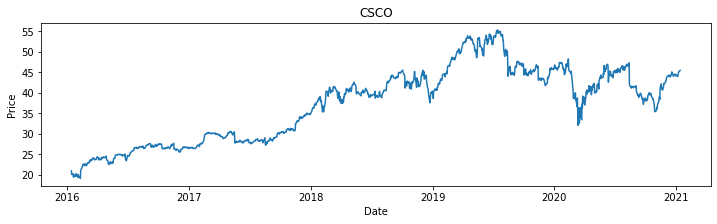

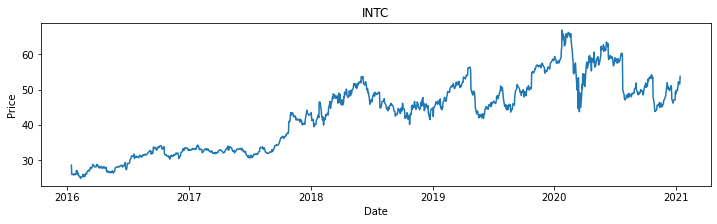

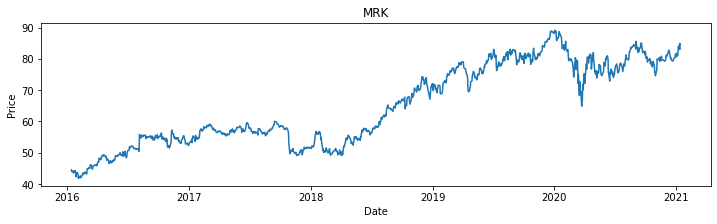

In [252]:
for i in screened:
    data1 = dr.data.get_data_yahoo(i, start = datetime.datetime.now() - datetime.timedelta(days=5*365), end = datetime.datetime.now())
    data1 = pd.DataFrame(data1)
    data1 = data1.reset_index()
    fig, ax = plt.subplots()
    ax.plot(data1['Date'], data1['Adj Close'])
    ax.set_title(i)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')    
    fig.set_size_inches(12, 3)

# TESTING

In [188]:
df_test = dr.data.get_data_yahoo('VRTX', start = datetime.datetime.now() - datetime.timedelta(days=5*365), end = datetime.datetime.now())
df_test = df_test.transpose()
df_test = df_test.loc['Adj Close']
df_test = df_test.transpose()
df_test = pd.DataFrame(df_test)
df_test.reset_index(level=0, inplace=True)
df_test['Date'] = df_test['Date'].astype('datetime64')
df_test.rename(columns = {'Date': 'date', 'Adj Close': 'adj_close'}, inplace = True)

def calc_slope(x):
    slope = np.polyfit(range(len(x)), x, 1)[0]
    return slope    

edf = si.get_cash_flow(stock)
edf = edf.loc['netIncome']
edf = pd.DataFrame(edf)
Earnings = (((edf['netIncome'][0]-edf['netIncome'][1])/edf['netIncome'][1])+((edf['netIncome'][1]-edf['netIncome'][2])/edf['netIncome'][2])+((edf['netIncome'][2]-edf['netIncome'][3])/edf['netIncome'][3]))/4


df_test['STD_DEV'] = df_test['adj_close'].rolling(window=264).std()
    #creates a column for 264 day (1 year - weekends) moving average
df_test['Moving_Average'] = df_test['adj_close'].rolling(window=264).mean()
    #creates a z-score column as it compares to the 264 day rolling average and STD_DEV
df_test['Z-Score'] = ((df_test['adj_close']-df_test['adj_close'].rolling(window=264).mean().shift(1))/df_test['adj_close'].rolling(window=264).std(ddof=0).shift(1))
    #creates a rolling slope column
df_test['Rolling_Slope'] = df_test.adj_close.rolling(1825, min_periods=2).apply(calc_slope)
    #creates an average earnings column
df_test['Earnings'] = Earnings
    #creates a column which holds a TRUE value if the stock has a z-score of -0.5 or less
df_test['Criteria_1'] = df_test['Z-Score'] <= -0.5
    #creates a column which holds a TRUE value if the 5y trendline has a positive slope
df_test['Criteria_2'] = df_test['Rolling_Slope'] > 0
    #creates a column which holds True if earnings have positive growth for last 5y
df_test['Criteria_3'] = df_test['Earnings'] > .10
    #df_tail(66) to chop the end of the dataframe and only use true criteria from the past quarter
df_test = df_test.tail(66)
    #creates a column to test if the criterias are true in the past month
df_test['Final_Criteria'] = (df_test['Criteria_1'] & df_test['Criteria_2'] & df_test['Criteria_3']) == True

In [189]:
df_test

,date,adj_close,STD_DEV,Moving_Average,Z-Score,Rolling_Slope,Earnings,Criteria_1,Criteria_2,Criteria_3,Final_Criteria
1192,2020-10-07,265.820007,35.062927,243.437197,0.645348,0.159099,3.168114,False,True,True,False
1193,2020-10-08,268.529999,34.847178,243.788144,0.717010,0.159151,3.168114,False,True,True,False
1194,2020-10-09,269.950012,34.604613,244.157197,0.752186,0.159209,3.168114,False,True,True,False
1195,2020-10-12,274.600006,34.362442,244.547727,0.881404,0.159285,3.168114,False,True,True,False
1196,2020-10-13,276.089996,34.102938,244.951288,0.919672,0.159366,3.168114,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-01-05,228.580002,26.660175,250.298522,-0.813335,0.151468,3.168114,True,True,True,True
1254,2021-01-06,226.649994,26.631724,250.326174,-0.888721,0.151343,3.168114,True,True,True,True
1255,2021-01-07,232.899994,26.577669,250.383446,-0.655582,0.151243,3.168114,True,True,True,True
1256,2021-01-08,237.000000,26.527293,250.445227,-0.504516,0.151158,3.168114,True,True,True,True


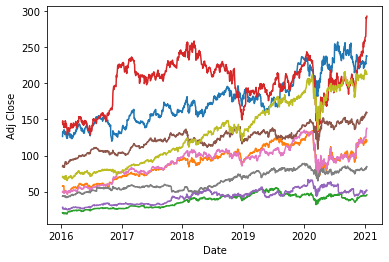

In [218]:
for stock in screened:
    data1 = dr.data.get_data_yahoo(stock, start = datetime.datetime.now() - datetime.timedelta(days=5*365), end = datetime.datetime.now())
    data1 = data1.reset_index()
    data1 = pd.DataFrame(data1)
    g = sns.lineplot(x = data1['Date'], y = data1['Adj Close'])
    g

KeyError: 'Date'

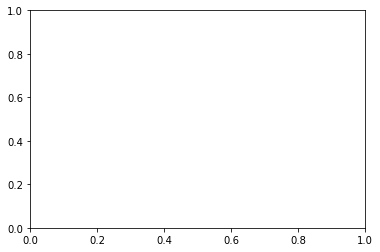

In [223]:
for stock in screened:
    data1 = dr.data.get_data_yahoo(stock, start = datetime.datetime.now() - datetime.timedelta(days=5*365), end = datetime.datetime.now())
    fig, ax = plt.subplots()
    ax.plot(data1['Date'], data1['Adj Close'])
    axs.set_xlim(0, 2)
    ax.set_title(stock)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')